# Set-60 Model


## Build Set-60-Dataset

Copied 1000 files from ../data/chest_xray/train/PNEUMONIA to ../data/train_data_chest_xray_set_60/PNEUMONIA.
Copied 600 files from ../data/chest_xray/train/NORMAL to ../data/train_data_chest_xray_set_60/NORMAL.


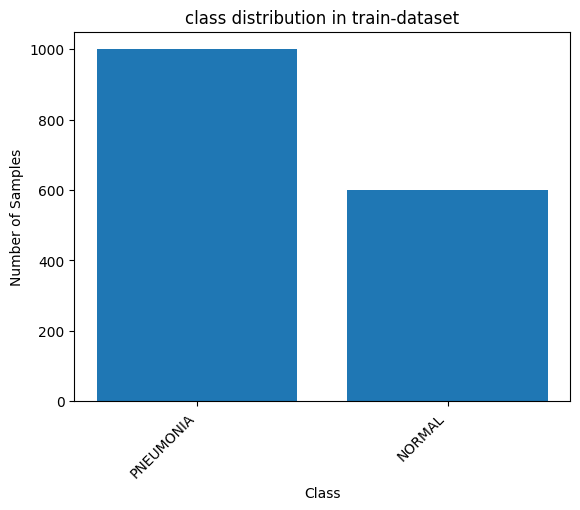

In [7]:
import shutil
import os
from dataset_splitter import copy_n_random_files
from plot_utils import plot_loss, plot_histogram_balance_of_dataset

train_data_dir = "../data/chest_xray/train/"
class1= "PNEUMONIA"
class2 = "NORMAL"
dest_folder = "../data/train_data_chest_xray_set_60"

# Ensure folder is empty
if os.path.exists(dest_folder):
    shutil.rmtree(dest_folder)

copy_n_random_files(1000, os.path.join(train_data_dir, class1), os.path.join(dest_folder, class1))
copy_n_random_files(600, os.path.join(train_data_dir, class2), os.path.join(dest_folder, class2))
plot_histogram_balance_of_dataset(dest_folder, "class distribution in train-dataset")

## Train Model

In [12]:

from model import Model

train_val_split_ratio = 0.8
batch_size = 32
learning_rate = 1e-4
patience_early_stopping = 15
patience_reduce_learning_rate = 5
factor_reduce_learning_rate = 0.5
weight_decay = 1e-6
momentum = 0.9
epochs = 320
train_data_dir = dest_folder
test_dir = "../data/chest_xray/test"

model = Model(learning_rate=learning_rate, batch_size=batch_size, patience_early_stopping=patience_early_stopping,
              patience_reduce_learning_rate=patience_reduce_learning_rate,
              factor_reduce_learning_rate=factor_reduce_learning_rate, train_dir=train_data_dir,
              weight_decay=weight_decay, momentum=momentum, test_dir=test_dir,
              train_val_split_ratio=train_val_split_ratio)

In [9]:
train_losses, val_losses = model.train_model(epochs)

Epoch 1/320, Train Loss: 0.6774, Validation Loss: 0.6723, Learning Rate: 0.0001, ECE: 0.0693, MCE: 0.2885, Acc: 0.5781, F1: 0.3663
Epoch 2/320, Train Loss: 0.6334, Validation Loss: 0.6325, Learning Rate: 0.0001, ECE: 0.2505, MCE: 0.5356, Acc: 0.5781, F1: 0.3663
Epoch 3/320, Train Loss: 0.5809, Validation Loss: 0.5717, Learning Rate: 0.0001, ECE: 0.2927, MCE: 0.4830, Acc: 0.6687, F1: 0.5655
Epoch 4/320, Train Loss: 0.5025, Validation Loss: 0.4713, Learning Rate: 0.0001, ECE: 0.2440, MCE: 0.4054, Acc: 0.8719, F1: 0.8640
Epoch 5/320, Train Loss: 0.3982, Validation Loss: 0.3716, Learning Rate: 0.0001, ECE: 0.1313, MCE: 0.4858, Acc: 0.9219, F1: 0.9204
Epoch 6/320, Train Loss: 0.3331, Validation Loss: 0.3447, Learning Rate: 0.0001, ECE: 0.0862, MCE: 0.4536, Acc: 0.9313, F1: 0.9298
Epoch 7/320, Train Loss: 0.3144, Validation Loss: 0.3352, Learning Rate: 0.0001, ECE: 0.0710, MCE: 0.5315, Acc: 0.9281, F1: 0.9267
Epoch 8/320, Train Loss: 0.3012, Validation Loss: 0.3292, Learning Rate: 0.0001, EC

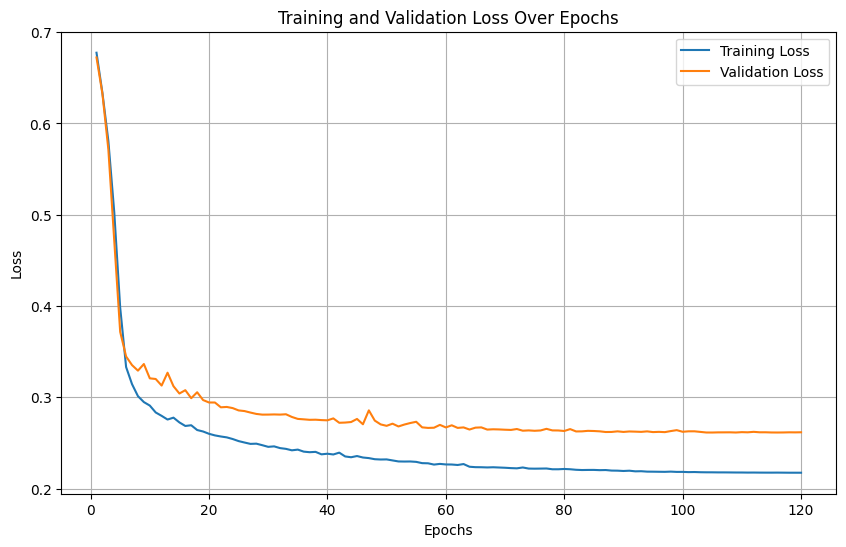

In [10]:
plot_loss(train_losses, val_losses)

In [11]:
import torch

torch.save(model.model.state_dict(), "../models/model_set_60.pth")